# Welcome to showing up in appointment project!

Project: Investigate a  showappointments Dataset - ---[showappointments]( https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv.)---
Table of Contents
Introduction
Data Wrangling
Exploratory Data Analysis
Conclusions

# Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

Question(s) for Analysis :
DO ScheduledDay affect showing up in our dataset ?
Do Gender affect showing up in our dataset ?
Do Scholarship affect showing up in our dataset ?
Do Age affect showing up in our dataset ?
Do SMS recieved affect showing up in our dataset ?
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Data Wrangling:
How many rows and columns exist in the dataframe? 
What types of columns that i will deal with is it int or object ?
Is there any useless columns ?
Is there any null values to drop ?
Is there any duplicated value to drop?
Is there any missing value?


In [19]:
app_df = pd.read_csv('appointments.csv')

In [20]:
app_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [21]:
#since hypertension word was written wrong ,so we have to replace i with y
app_df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)

In [22]:
app_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [23]:
# to have the number of  sample in rows & number of columns
app_df.shape
# so we have 110527 sample and 14 columns

(110527, 14)

In [24]:
# to see if there is any missing values and types of information in each columns 
app_df.info()
# so we have no missing values and 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [25]:
# number of dublecated values  so from running code thier are no dublicated values to drop
sum(app_df.duplicated())

0

In [26]:
####Data Cleaning
## to see if there is any null rows and the total number 
app_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

# Data Cleaning¶


In [27]:
### Now it is time for cleaning unuseful columns to make it easier in analysis 
app_df.drop(['PatientId','AppointmentID','AppointmentDay','Neighbourhood'] , axis= 1, inplace = True)

In [28]:
app_df.head(3)

,Gender,ScheduledDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,62,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,56,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,62,0,0,0,0,0,0,No


In [29]:
#### I have to change the name as "NO" not readable as column but as a built in  data

app_df.rename(columns={'No-show':'notshowed'}, inplace=True)


In [30]:
### Note that scaduled day cant work so it is a must to convert its type from string to datetime ,so i can extract hour from it
app_df['ScheduledDay'] = pd.to_datetime(app_df.ScheduledDay	)

In [31]:
app_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   Gender        110527 non-null  object             
 1   ScheduledDay  110527 non-null  datetime64[ns, UTC]
 2   Age           110527 non-null  int64              
 3   Scholarship   110527 non-null  int64              
 4   Hypertension  110527 non-null  int64              
 5   Diabetes      110527 non-null  int64              
 6   Alcoholism    110527 non-null  int64              
 7   Handcap       110527 non-null  int64              
 8   SMS_received  110527 non-null  int64              
 9   notshowed     110527 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(7), object(2)
memory usage: 8.4+ MB


In [32]:
app_df.drop_duplicates(keep=False,inplace=True)

In [33]:
app_df.head()

,Gender,ScheduledDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,notshowed
0,F,2016-04-29 18:38:08+00:00,62,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,56,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,62,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,8,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,56,0,1,1,0,0,0,No


In [34]:
### here I want to know the mean age that shoed up on time 
#### that means age showed up most at age 37 years and mean age that not show around 34 years
#### that too close 
app_df.groupby('notshowed').Age.mean()

notshowed
No     37.828036
Yes    34.318555
Name: Age, dtype: float64

In [35]:
app_df.notshowed.value_counts()

No     87315
Yes    21811
Name: notshowed, dtype: int64

In [36]:
#### now we want to know the mean in which is

app_df.ScheduledDay.dt.hour.mean()

10.770018144163627

In [37]:
app_df['scheduled_hour'] = app_df.ScheduledDay.dt.hour

In [38]:
app_df.head(2)

,Gender,ScheduledDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,notshowed,scheduled_hour
0,F,2016-04-29 18:38:08+00:00,62,0,1,0,0,0,0,No,18
1,M,2016-04-29 16:08:27+00:00,56,0,0,0,0,0,0,No,16


array([[<AxesSubplot:title={'center':'ScheduledDay'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Scholarship'}>],
       [<AxesSubplot:title={'center':'Hypertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Alcoholism'}>],
       [<AxesSubplot:title={'center':'Handcap'}>,
        <AxesSubplot:title={'center':'SMS_received'}>,
        <AxesSubplot:title={'center':'scheduled_hour'}>]], dtype=object)

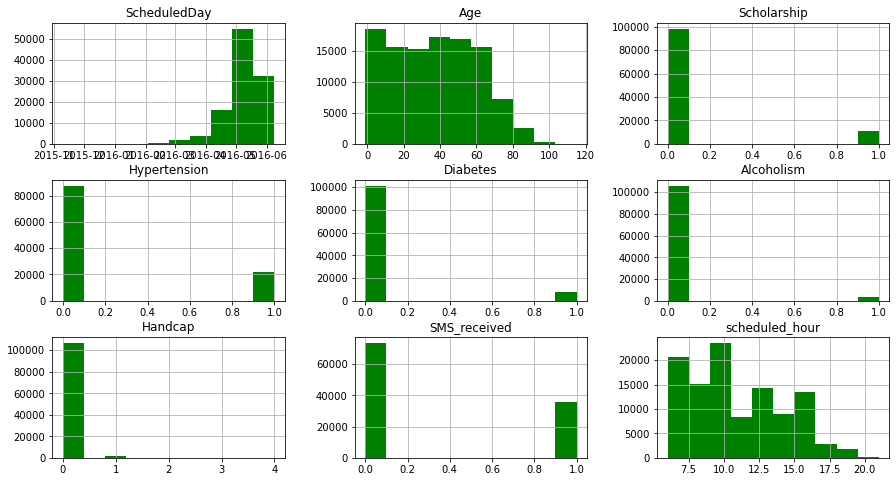

In [39]:
##### in this action we will have a general look in all factors 
## from those plot we can see that all factors have only  two variables  except age and  have alot of values 
app_df.hist(figsize=(15 ,8) , color = ('green'))

# Exploratory Data Analysis



# How many males and females exist in my data?
# What is the percentage of female and male show up ?

In [50]:
### here i will know the nuber of femals and males in my sample 
#### so i have more females in my sample 
app_df.Gender.value_counts()

F    70963
M    38163
Name: Gender, dtype: int64

In [51]:
#### here i want to know how mant female and how many male showed up
gender= app_df[app_df.notshowed == "No" ]

In [52]:
gender.Gender.value_counts()
#### here we see that about more females showed up but that is not true as number of females in sample more than number of males so we have to get the percentage 



F    56652
M    30663
Name: Gender, dtype: int64

In [54]:
### calculatin percentage will give true evaluation of affecting of gender on showing up
percentage = gender.Gender.value_counts()/app_df.Gender.value_counts() *100

<AxesSubplot:title={'center':'how gender can affect showing up in appointments'}, xlabel='percentage of female and males who showed up', ylabel='percentage%'>

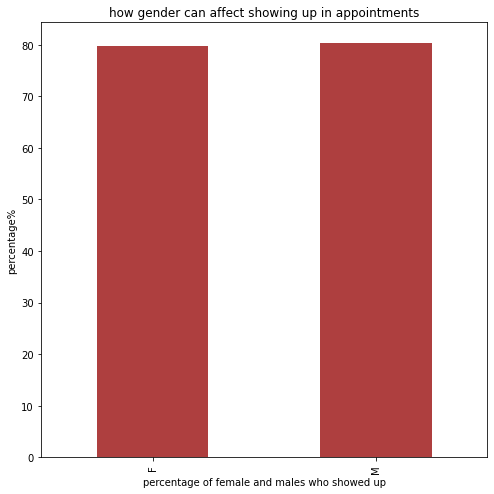

In [55]:
#### From the bar there is slight diffrance between males and females who showed up
percentage.plot(kind ='bar' , figsize = (8, 8) , xlabel = ('percentage of female and males who showed up'),ylabel = ('percentage%'), title = "how gender can affect showing up in appointments", color = 'brown', alpha =0.9)

# Which hour of the day patient schadueld and show up ?
# does it affect showing up or not?

In [56]:
#### scheduled hour have to be filtered in showing up samples only to give an accurate effect on our data analysis
##### so first i will filter notshowed column to all those who showed up in thier appointment
hour = app_df[app_df.notshowed == "No"]


In [57]:
app_df.head(2)

,Gender,ScheduledDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,notshowed,scheduled_hour
0,F,2016-04-29 18:38:08+00:00,62,0,1,0,0,0,0,No,18
1,M,2016-04-29 16:08:27+00:00,56,0,0,0,0,0,0,No,16


In [58]:
### know it is time to know if schadueled hour really affect showing up or no 

hour.groupby('notshowed').scheduled_hour.value_counts()
## we can see that most of people showed up in period from 7 to 10 and their is big differance between this period of time and other hours

notshowed  scheduled_hour
No         7                 16211
           8                 12397
           9                 10197
           10                 8505
           13                 7063
           14                 6989
           11                 6444
           15                 6126
           12                 4284
           16                 4168
           17                 2168
           6                  1271
           18                 1050
           19                  372
           20                   68
           21                    2
Name: scheduled_hour, dtype: int64

<AxesSubplot:title={'center':'Scheduled hour effect on showing up in appointment'}, xlabel='notshowed,scheduled_hour'>

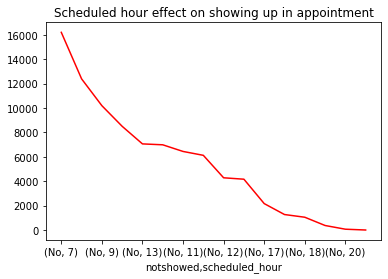

In [513]:

hour.groupby('notshowed').scheduled_hour.value_counts().plot( x = 'time in hour' , y = 'number of patient showed up per hour', title = 'Scheduled hour effect on showing up in appointment' , color= 'red')

# What age seems to show up most ?
# Does it affect showing up or no ?

In [60]:
app_df.Age.mean()

37.1265967780364

Text(0.5, 1.0, 'the most age showed up')

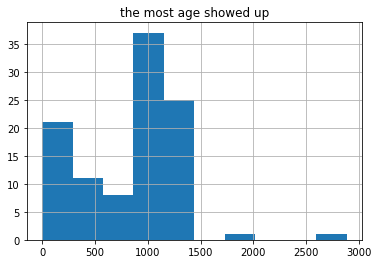

In [70]:
hour.Age.value_counts().hist() ### we used hour instead app_df as it contain all patient who showed up
plt.gca().set_title('the most age showed up')

# What is the effect of Scholarship, Hypertension ,Diabetes ,Alcoholism ,Handcap and  SMS_received  in showing up ?

In [76]:
#### filter showing up in hypertension so i can know it affect showing up or not
hypertension = app_df[app_df.Hypertension == 1]

In [77]:
hypertension.notshowed.value_counts()

No     17874
Yes     3685
Name: notshowed, dtype: int64

In [78]:
#### filter showing up in handcap so i can know it affect showing up or not
handcap = app_df[app_df.Handcap == 1]

In [79]:
handcap.notshowed.value_counts()

No     1655
Yes     350
Name: notshowed, dtype: int64

In [80]:
#### filter showing up in scholarship so i can know it affect showing up or not
scholarship = app_df[app_df.Scholarship == 1]

In [81]:
scholarship.notshowed.value_counts()

No     8208
Yes    2531
Name: notshowed, dtype: int64

In [82]:
#### filter showing up in diabetes so i can know it affect showing up or not
diabetes = app_df[app_df.Diabetes == 1 ]

In [83]:

diabetes.notshowed.value_counts()

No     6430
Yes    1415
Name: notshowed, dtype: int64

In [84]:
#### filter showing up in sms so i can know it affect showing up or not
sms = app_df[app_df.SMS_received == 1 ]

In [85]:
sms.notshowed.value_counts()
### it showed that this factor is the most afficting factor in showing up as about 80% who recieved sms is showing up 

No     25696
Yes     9780
Name: notshowed, dtype: int64

In [86]:
#### filter showing up in alcoholism so i can know it affect showing up or not
alcohol = app_df[app_df.Alcoholism == 1]

In [87]:
alcohol.notshowed.value_counts()

No     2670
Yes     660
Name: notshowed, dtype: int64

In [88]:
###### conclusion of analysis 

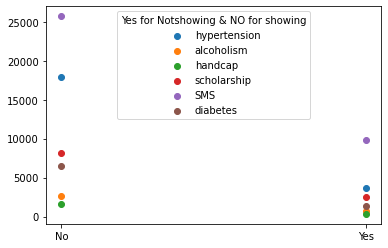

In [89]:
#### Do illness type , handcap , scholarship and sms receive affect showing up ? 

# X-axis values
NOT_showed = ["No","Yes"]
  
# Y1-axis values
hypertension  = [17874 ,  3685]
  
# Y2-axis values
handcap = [1655 , 350 ]

#Y3_axis values
scholarship = [8208 ,2531]

#Y4 axis values
alcohol = [2670 , 660]

#Y5 axis values
sms = [25696 , 9780]
#Y6 axis values 
diabetes = [6430 , 1415]
## shape 


# Function to plot  
plt.scatter( NOT_showed,hypertension,  label ='hypertension' )
plt.scatter( NOT_showed ,alcohol , label ='alcoholism')
plt.scatter (NOT_showed ,handcap , label ='handcap' )
plt.scatter( NOT_showed ,scholarship , label ='scholarship')  
plt.scatter( NOT_showed, sms ,label ='SMS' )
plt.scatter( NOT_showed, diabetes ,label ='diabetes' )
# Function add a legend  
plt.legend( loc = "upper center" ).set_title("Yes for Notshowing & NO for showing")   
  
# function to show the plot
plt.show()
#### we notice that the most factor affect showing up here is sms receivation 



In [90]:
##### after analysis we found out that most factor affect showing up is SMS recieve 
####,then Scheduled time as thier is period of the day patient prefer to show up like period from 7to 10
###then Age as people in the middle  finally gender.And hypertention comes after them but it is not a general factor it is mor special

# conclusion

# from analysis it showed up that the most factor affecting showed up is SMS receivation as 25696 of 35476 who received sms have been showed up in appointment 
## we can make a list in descending from the most effective to the least
###  1- SMS
###  2- schaduled hour
###  3- Age 
###  4- Gender


# summary
## I think may there is factors need to be add for example :
                            ### distance between hospital and patient will be useful .
                            ### names of doctors in each clinc that would refer to the most popular doctor affecting showing up. 
        

In [93]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295